<a href="https://colab.research.google.com/github/singhsukhendra/Breast-Cancer-Coimbra-Data-Set-/blob/master/Machine_Learning_Algorithms_on_Breast_Cancer_Coimbra_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#First import all the libraries needed

import numpy as np #for linear algebra
import pandas as pd #for chopping, processing
import csv #for opening csv files
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting the graphs
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.pipeline import Pipeline #to assemble steps for cross validation
from sklearn.preprocessing import PolynomialFeatures #for all the polynomial features
from sklearn import svm #for Support Vector Machines
from sklearn.neighbors import NearestNeighbors #for nearest neighbor classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
from sklearn.naive_bayes import GaussianNB  #for naive bayes classifier
from scipy import stats #for statistical info
from sklearn.model_selection import train_test_split # to split the data in train and test
from sklearn.model_selection import KFold # for cross validation
#from sklearn.grid_search import GridSearchCV  # for tuning parameters
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  #for k-neighbor classifier
from sklearn import metrics  # for checking the accuracy 
from time import time

In [0]:
data = pd.read_csv("dataR2.csv")

In [28]:
data.shape

(116, 10)

In [29]:
#Description of the dataset

#how many cases are included in the dataset
length = len(data)
#how many features are in the dataset
features = data.shape[1]-1

# Number of malignant cases
malignant = len(data[data['Classification']=='Yes'])

#Number of benign cases
benign = len(data[data['Classification']=='No'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print ("There are "+ str(len(data))+" cases in this dataset")
print ("There are {}".format(features)+" features in this dataset")
print ("There are {}".format(malignant)+" cases diagnosed as malignant tumor")
print ("There are {}".format(benign)+" cases diagnosed as benign tumor")
print ("The percentage of malignant cases is: {:.4f}%".format(rate))


There are 116 cases in this dataset
There are 9 features in this dataset
There are 64 cases diagnosed as malignant tumor
There are 52 cases diagnosed as benign tumor
The percentage of malignant cases is: 55.1724%


In [32]:
data.Classification.unique()

array(['No', 'Yes'], dtype=object)

In [33]:
data.head(1)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.5,70,2.707,0.467409,8.8071,9.7024,7.99585,417.114,No


In [34]:
features = list(data.columns[0:9])
print (features)

['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']


In [35]:
target = data.columns[9:10]
print (target)

Index(['Classification'], dtype='object')


In [0]:
#Now we need to separate the data into feature data and target data
X = data[features] #our features that we will use to predict Y
Y = data[target] #our dependent variable, the one we are trying to predict from X

In [37]:
X.shape

(116, 9)

In [38]:
Y.shape

(116, 1)

In [39]:
print ("\nFeature values:")
print (X.head(1))
print ("\nTarget values:")
print (Y.head(1))


Feature values:
   Age   BMI  Glucose  Insulin      HOMA  Leptin  Adiponectin  Resistin  \
0   48  23.5       70    2.707  0.467409  8.8071       9.7024   7.99585   

     MCP.1  
0  417.114  

Target values:
  Classification
0             No


In [41]:
df=pd.DataFrame(data)
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,No
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,No
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,No
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,No
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,No
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,No
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,No
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,No
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,No
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,No


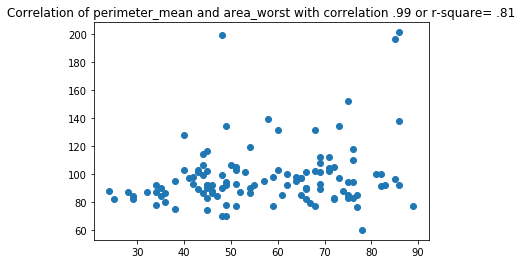

In [42]:
#Research shows that any variables that are highly correlated
#should be removed from further analysis. But, PCA takes care of multicollinearity, so maybe 
#I identify them which ones there are and let PCA to do its job.  
#Just in case let's see how two highly correlated variables look like
#using prettyplots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['Age']
    y=df['Glucose']
    ax.scatter(x,y, label=str(i))
#ax.legend()
ax.set_title('Correlation of perimeter_mean and area_worst with correlation .99 or r-square= .81')
fig.savefig('scatter.png')

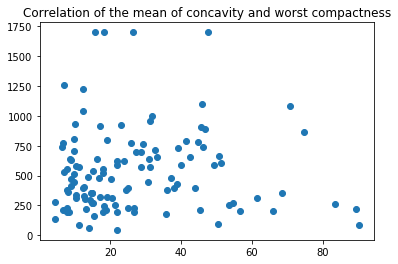

In [43]:
#Let's visualize another set of variables that are not correlated as highly as the first ones
#These have a correlation coefficient of .75 which means an r-squared score of approximately .49
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['Leptin']
    y=df['MCP.1']
    ax.scatter(x,y, label=str(i))
#ax.legend()
ax.set_title('Correlation of the mean of concavity and worst compactness')
fig.savefig('scatter.png')

In [44]:
 def preprocess_features(X):   
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all M/B malignant/benign values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['Yes', 'No'], [1, 0])
 
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X = preprocess_features(X)
Y = preprocess_features(Y)
print ("Processed feature columns ({} total features):\n{}".format(len(X.columns), list(X.columns)))
print ("Target columns ({} total features):\n{}".format(len(Y.columns), list(Y.columns)))

Processed feature columns (9 total features):
['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
Target columns (1 total features):
['Classification']


In [45]:
# import cross_validation to split the train and testing
from sklearn.model_selection import train_test_split
# Set the number of training points
nr_train = 93
# Set the number of testing points
nr_test = X.shape[0] - nr_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=nr_test, random_state=40)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 93 samples.
Testing set has 23 samples.


In [0]:
from sklearn.metrics import f1_score
def train_classifier(clf, X_train, Y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, Y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    Y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, Y_pred, pos_label=1)


def train_predict(clf, X_train, Y_train, X_test, Y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, Y_train)
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, Y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, Y_test)))


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [0]:
clf_A = KNeighborsClassifier()
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = SVC()
clf_D = GaussianNB()
clf_E = RandomForestClassifier(n_estimators=10)
clf_G = AdaBoostClassifier()
clf_H = QuadraticDiscriminantAnalysis()
clf_I = MLPClassifier(alpha=1)

In [0]:
X_train_23 = X_train[:23]
Y_train_23 = Y_train[:23]

X_train_46 = X_train[:46]
Y_train_46 = Y_train[:46]

X_train_69 = X_train[:69]
Y_train_69 = Y_train[:69]

X_train_93 = X_train[:93]
Y_train_93 = Y_train[:93]

In [49]:
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_G, clf_H, clf_I]:
    for size in [69, 93]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print ('/n')

Training a KNeighborsClassifier using a training set size of 69. . .
Trained model in 0.0035 seconds
Made predictions in 0.0085 seconds.
F1 score for training set: 0.7297.
Made predictions in 0.0027 seconds.
F1 score for test set: 0.5714.
/n
Training a KNeighborsClassifier using a training set size of 93. . .
Trained model in 0.0019 seconds
Made predictions in 0.0043 seconds.
F1 score for training set: 0.7477.
Made predictions in 0.0022 seconds.
F1 score for test set: 0.6667.
/n
Training a DecisionTreeClassifier using a training set size of 69. . .
Trained model in 0.0019 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.7273.
/n
Training a DecisionTreeClassifier using a training set size of 93. . .
Trained model in 0.0018 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.6667.
/n
Training a SVC using a train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid t


/n
Training a AdaBoostClassifier using a training set size of 93. . .
Trained model in 0.0761 seconds
Made predictions in 0.0070 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0061 seconds.
F1 score for test set: 0.6000.
/n
Training a QuadraticDiscriminantAnalysis using a training set size of 69. . .
Trained model in 0.0014 seconds
Made predictions in 0.0008 seconds.
F1 score for training set: 0.7869.
Made predictions in 0.0007 seconds.
F1 score for test set: 0.6000.
/n
Training a QuadraticDiscriminantAnalysis using a training set size of 93. . .
Trained model in 0.0012 seconds
Made predictions in 0.0007 seconds.
F1 score for training set: 0.7073.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.4444.
/n
Training a MLPClassifier using a training set size of 69. . .
Trained model in 0.0181 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.6863.
Made predictions in 0.0012 seconds.
F1 score for test set: 0.6000.
/n
Training a MLPClass

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Trained model in 0.1698 seconds
Made predictions in 0.0013 seconds.
F1 score for training set: 0.8713.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.7500.
/n


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [50]:
clf_D = GaussianNB()
clf_G = AdaBoostClassifier(algorithm = 'SAMME')
clf_H = QuadraticDiscriminantAnalysis(reg_param = 0.001, store_covariances=True, tol = 0.01)

TypeError: ignored

In [0]:
X_train_300 = X_train[:69]
Y_train_300 = Y_train[:69]

X_train_300 = X_train[:93]
Y_train_300 = Y_train[:93]

In [52]:
for clf in [clf_D, clf_G, clf_H]:
    for size in [69, 93]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print ('/n')

Training a GaussianNB using a training set size of 69. . .
Trained model in 0.0026 seconds
Made predictions in 0.0017 seconds.
F1 score for training set: 0.6545.
Made predictions in 0.0016 seconds.
F1 score for test set: 0.6667.
/n
Training a GaussianNB using a training set size of 93. . .
Trained model in 0.0026 seconds
Made predictions in 0.0019 seconds.
F1 score for training set: 0.5000.
Made predictions in 0.0009 seconds.
F1 score for test set: 0.6000.
/n
Training a AdaBoostClassifier using a training set size of 69. . .
Trained model in 0.0599 seconds
Made predictions in 0.0045 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0041 seconds.
F1 score for test set: 0.7273.
/n
Training a AdaBoostClassifier using a training set size of 93. . .
Trained model in 0.0597 seconds
Made predictions in 0.0045 seconds.
F1 score for training set: 0.9703.
Made predictions in 0.0047 seconds.
F1 score for test set: 0.9286.
/n
Training a QuadraticDiscriminantAnalysis using a trainin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [54]:
Y_test.shape

(23, 1)

In [0]:
from sklearn.datasets import make_classification

In [0]:
!pip install pandas==0.22

In [0]:
from sklearn import metrics
import pandas as pd
from ggplot import *
import rpy2

In [0]:
! pip install ggplot

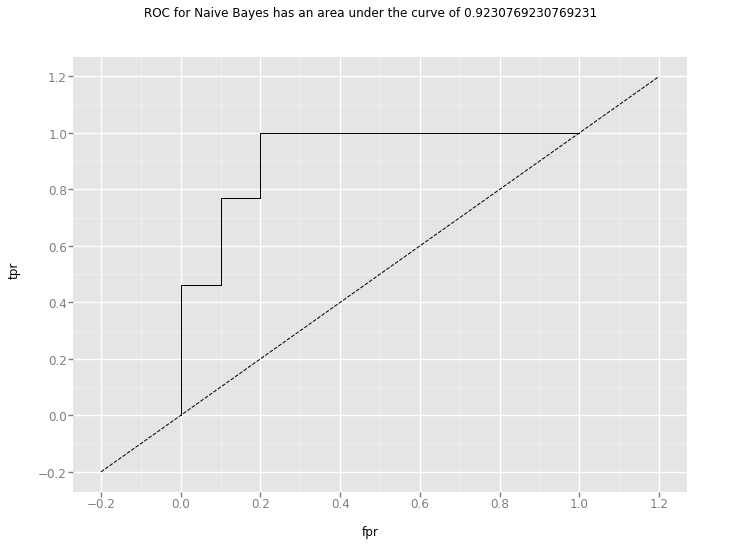

<ggplot: (8734789864105)>

In [57]:
# ROC curve for Naive Bayes
preds = clf_D.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for Naive Bayes has an area under the curve of " + str(metrics.auc(fpr,tpr)))
#auc = metrics.auc(fpr,tpr)
#ggtitle ("Area under the curve is "+ str(auc))
#ggtitle("ROC Curve w/ AUC=%s" % str(auc))

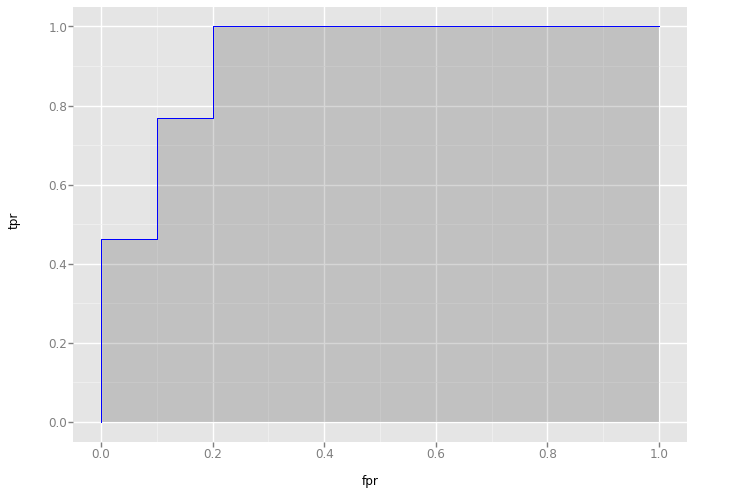

<ggplot: (8734789864049)>

In [58]:

auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', y='tpr')) + geom_area(alpha=0.2) + geom_line(aes(y='tpr', color = 'blue'))

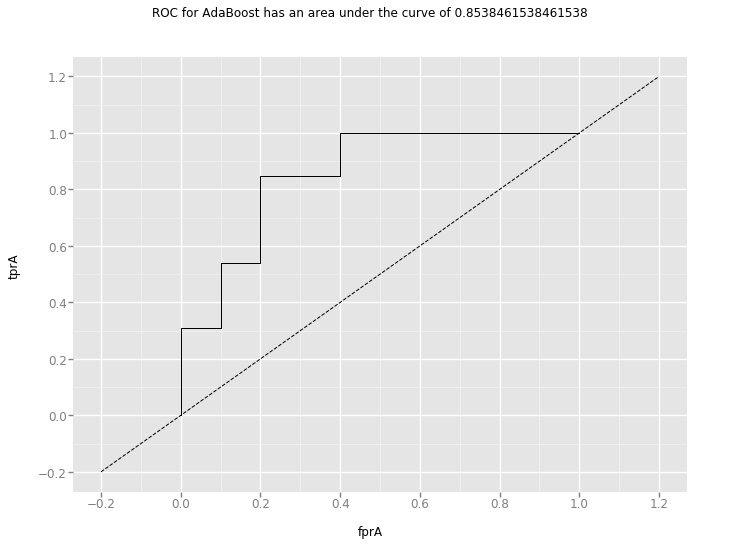

<ggplot: (8734788599844)>

In [59]:
# ROC curve for AdaBoost
preds = clf_G.predict_proba(X_test)[:,1]
fprA, tprA, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprA=fprA, tprA=tprA))
ggplot(df, aes(x='fprA', y='tprA')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for AdaBoost has an area under the curve of " + str(metrics.auc(fprA,tprA)))

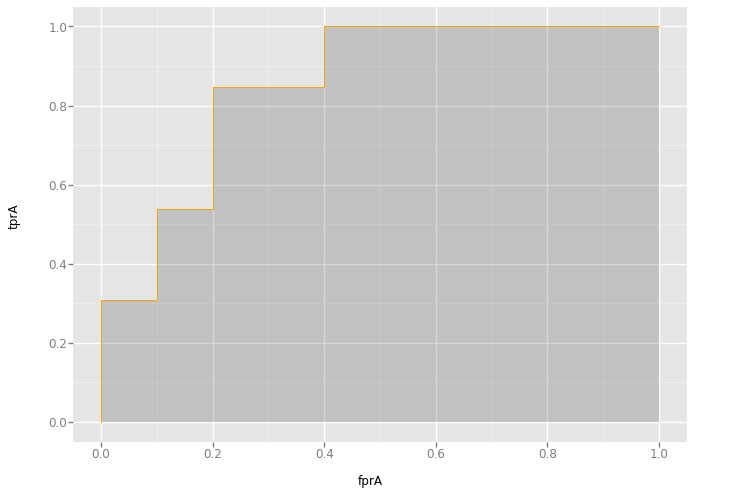

<ggplot: (-9223363302064911763)>

In [60]:
auc = metrics.auc(fprA,tprA)
ggplot(df, aes(x='fprA', y='tprA')) + geom_area(alpha=0.2) + geom_line(aes(y='tprA', colour = 'orange'))

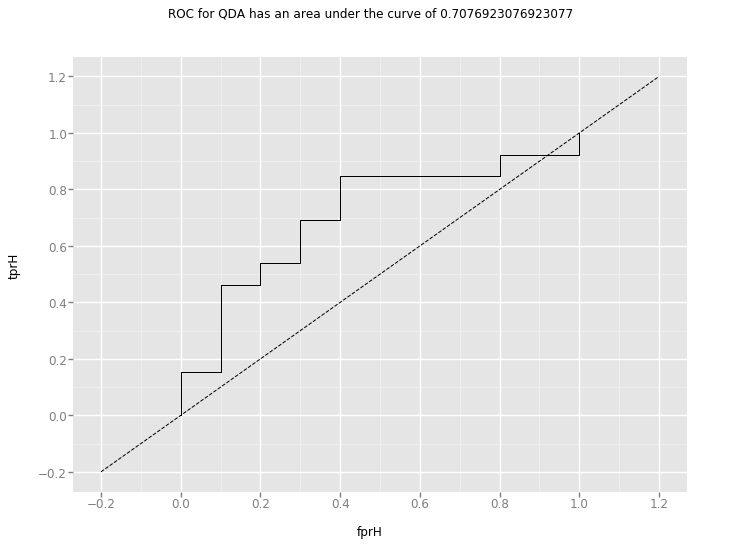

<ggplot: (8734793470258)>

In [61]:
# ROC curve for QDA
preds = clf_H.predict_proba(X_test)[:,1]
fprH, tprH, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprH=fprH, tprH=tprH))
ggplot(df, aes(x='fprH', y='tprH')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for QDA has an area under the curve of " + str(metrics.auc(fprH,tprH)))

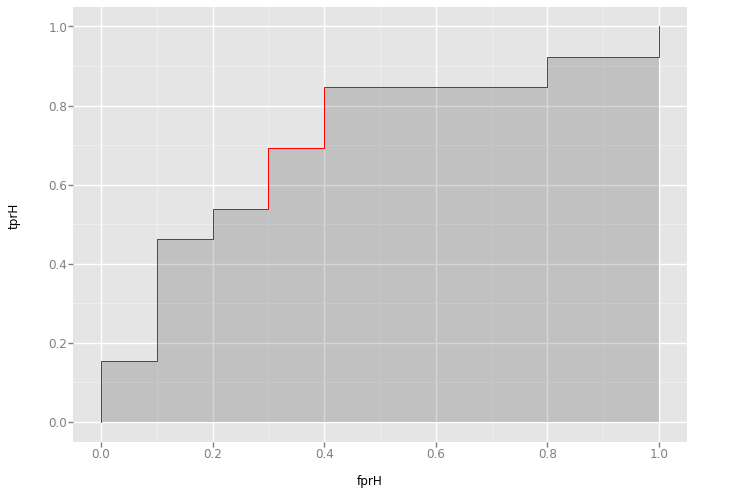

<ggplot: (-9223363302064745784)>

In [62]:
auc = metrics.auc(fprH,tprH)
ggplot(df, aes(x='fprH', y='tprH')) + geom_area(alpha=0.2) + geom_line(aes(y='tprH', color = 'red'))

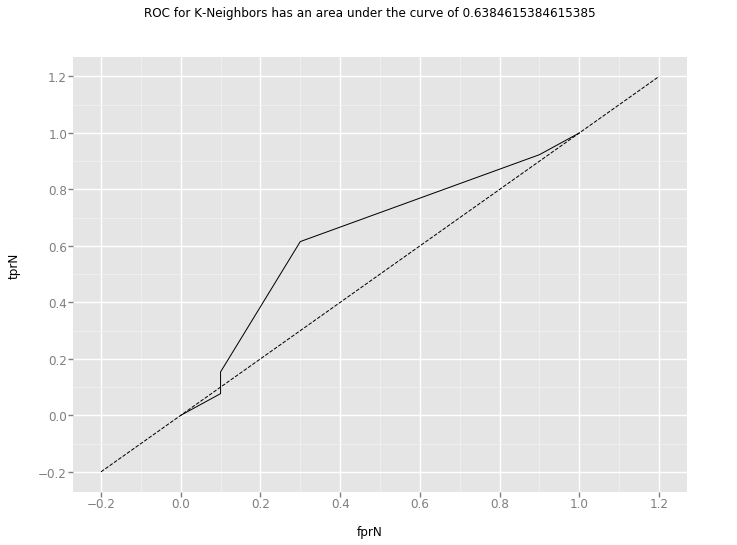

<ggplot: (8734788534690)>

In [63]:
# ROC curve for K-Neighbors
preds = clf_A.predict_proba(X_test)[:,1]
fprN, tprN, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprN=fprN, tprN=tprN))
ggplot(df, aes(x='fprN', y='tprN')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for K-Neighbors has an area under the curve of " + str(metrics.auc(fprN,tprN)))

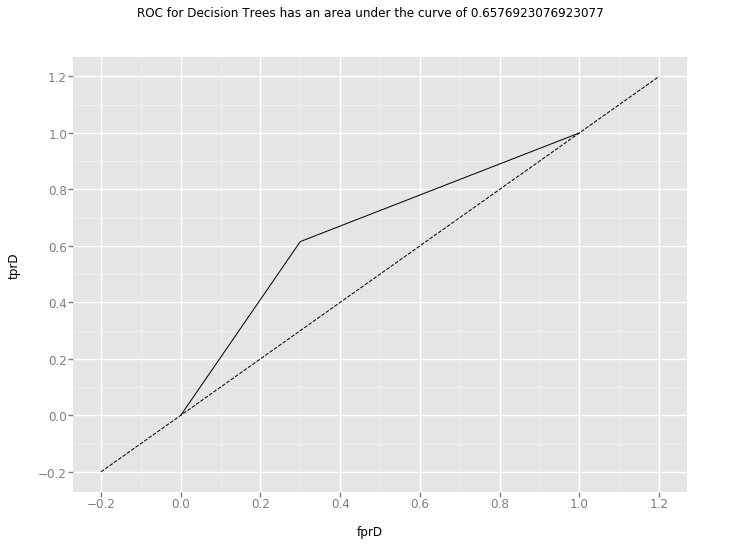

<ggplot: (8734788554998)>

In [64]:
# ROC curve for Decision trees
preds = clf_B.predict_proba(X_test)[:,1]
fprD, tprD, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprD=fprD, tprD=tprD))
ggplot(df, aes(x='fprD', y='tprD')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for Decision Trees has an area under the curve of " + str(metrics.auc(fprD,tprD)))


In [66]:
# Set the number of training points much smaller than before
nr_train = 93
# Set the number of testing points
nr_test = X.shape[0] - nr_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=nr_test, random_state=40)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 93 samples.
Testing set has 23 samples.


In [69]:
for clf in [clf_D, clf_G, clf_H]:
    for size in [93]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print ('/n')

Training a GaussianNB using a training set size of 93. . .
Trained model in 0.0042 seconds
Made predictions in 0.0014 seconds.
F1 score for training set: 0.5000.
Made predictions in 0.0008 seconds.
F1 score for test set: 0.6000.
/n
Training a AdaBoostClassifier using a training set size of 93. . .
Trained model in 0.0608 seconds
Made predictions in 0.0044 seconds.
F1 score for training set: 0.9703.
Made predictions in 0.0040 seconds.
F1 score for test set: 0.9286.
/n
Training a QuadraticDiscriminantAnalysis using a training set size of 93. . .
Trained model in 0.0015 seconds
Made predictions in 0.0008 seconds.
F1 score for training set: 0.7073.
Made predictions in 0.0007 seconds.
F1 score for test set: 0.4444.
/n


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


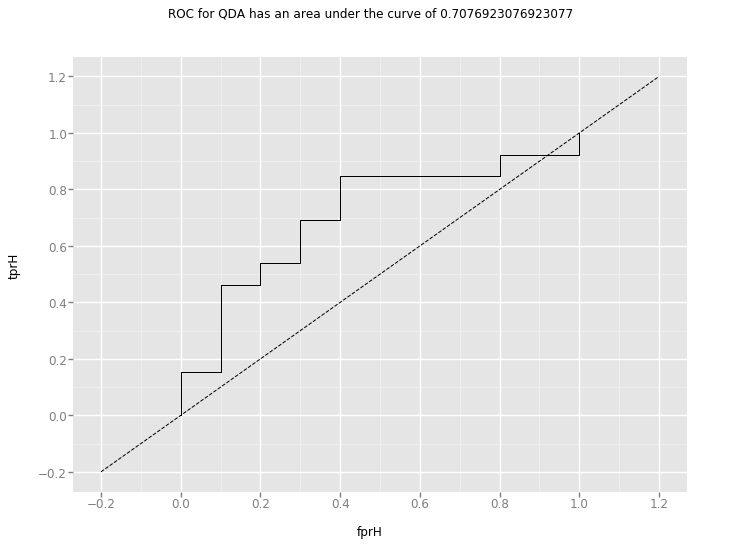

<ggplot: (8734788422846)>

In [70]:
preds = clf_H.predict_proba(X_test)[:,1]
fprH, tprH, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprH=fprH, tprH=tprH))
ggplot(df, aes(x='fprH', y='tprH')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for QDA has an area under the curve of " + str(metrics.auc(fprH,tprH)))

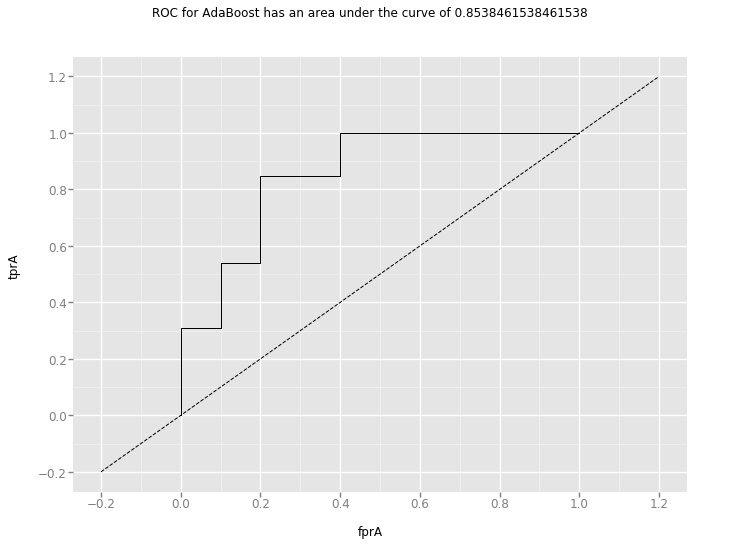

<ggplot: (8734788415864)>

In [71]:
# ROC curve for AdaBoost
preds = clf_G.predict_proba(X_test)[:,1]
fprA, tprA, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprA=fprA, tprA=tprA))
ggplot(df, aes(x='fprA', y='tprA')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for AdaBoost has an area under the curve of " + str(metrics.auc(fprA,tprA)))

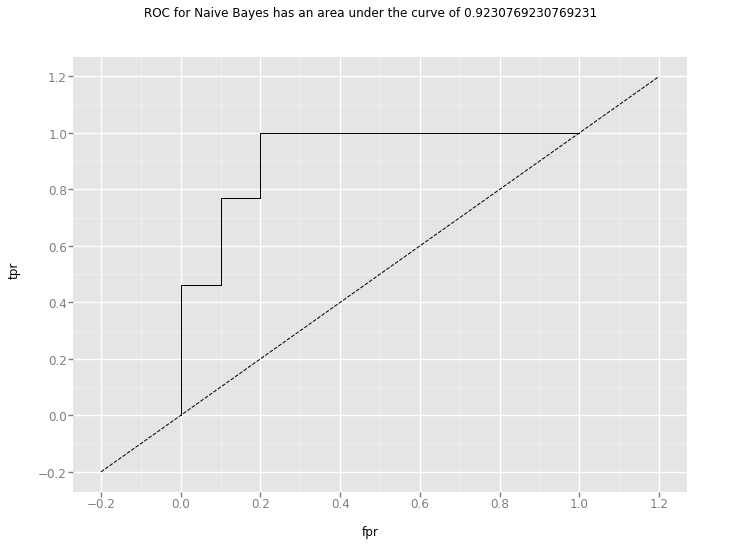

<ggplot: (-9223363302066389290)>

In [72]:
# ROC curve for Naive Bayes
preds = clf_D.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for Naive Bayes has an area under the curve of " + str(metrics.auc(fpr,tpr)))

In [73]:
# Set the number of training points much smaller than before
nr_train = 80
# Set the number of testing points
nr_test = X.shape[0] - nr_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=nr_test, random_state=40)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 80 samples.
Testing set has 36 samples.


In [74]:
for clf in [clf_D, clf_G, clf_H]:
    for size in [20]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print ('/n')

Training a GaussianNB using a training set size of 20. . .
Trained model in 0.0030 seconds
Made predictions in 0.0013 seconds.
F1 score for training set: 0.7500.
Made predictions in 0.0012 seconds.
F1 score for test set: 0.5455.
/n
Training a AdaBoostClassifier using a training set size of 20. . .
Trained model in 0.0553 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0041 seconds.
F1 score for test set: 0.7500.
/n
Training a QuadraticDiscriminantAnalysis using a training set size of 20. . .
Trained model in 0.0064 seconds
Made predictions in 0.0009 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0008 seconds.
F1 score for test set: 0.0000.
/n


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/class